In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
train = pd.read_csv('./all/train.csv')
test = pd.read_csv('./all/test.csv')
submit = pd.read_csv('./all/gender_submission.csv')

data = train.append(test, sort=True)
data.reset_index(inplace=True, drop=True)
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


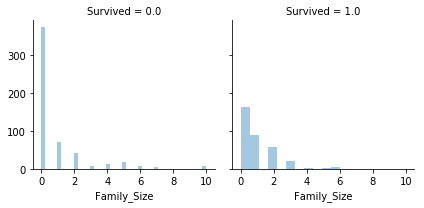

In [3]:
data['Family_Size'] = data['Parch'] + data['SibSp']
g = sns.FacetGrid(data, col='Survived')
g.map(sns.distplot, 'Family_Size', kde=False)

In [4]:
data['Title1'] = data['Name'].str.split(', ', expand=True)[1]
data['Name'].str.split(', ', expand=True).head(3)
data['Title1'].head(3)
data['Title1'] = data['Title1'].str.split('.', expand=True)[0]
data['Title1'].head(3)
data.head(10)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,Mr
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,Mrs
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,Mrs
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,0,Mr
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,0,Mr
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,4,Master
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,2,Mrs
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,1,Mrs


In [5]:
data['Title2'] = data['Title1'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','the Countess','Jonkheer','Col','Rev','Capt','Sir','Don','Dona'], ['Miss','Mrs','Miss','Mr','Mr','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Mr','Mrs'])

In [6]:
data['Ticket_info'] = data['Ticket'].apply(lambda x: x.replace('.', '').strip().split(' ')[0] if not x.isdigit() else 'X')
data['Ticket_info'] = data['Ticket'].apply(lambda x: x.replace('.', '').replace('/', '').strip().split(' ')[0] if not x.isdigit() else 'X')
data.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,Mr,Mr,A5
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,Mrs,Mrs,PC
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss,Miss,STONO2
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,Mrs,Mrs,X
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr,Mr,X
5,NaN,NaN,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,0,Mr,Mr,X
6,54.0,E46,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,0,Mr,Mr,X
7,2.0,NaN,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,4,Master,Master,X
8,27.0,NaN,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,2,Mrs,Mrs,X
9,14.0,NaN,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,1,Mrs,Mrs,X


In [7]:
data['Embarked'] = data['Embarked'].fillna('S')
data['Fare'] = data['Fare'].fillna(data['Fare'].mean())

data['Cabin'] = data['Cabin'].apply(lambda x: str(x)[0] if not pd.isnull(x) else 'NoCabin')
data.head(10)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
0,22.0,NoCabin,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,1,Mr,Mr,A5
1,38.0,C,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,Mrs,Mrs,PC
2,26.0,NoCabin,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss,Miss,STONO2
3,35.0,C,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,Mrs,Mrs,X
4,35.0,NoCabin,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr,Mr,X
5,NaN,NoCabin,Q,8.4583,"Moran, Mr. James",0,6,3,male,0,0.0,330877,0,Mr,Mr,X
6,54.0,E,S,51.8625,"McCarthy, Mr. Timothy J",0,7,1,male,0,0.0,17463,0,Mr,Mr,X
7,2.0,NoCabin,S,21.0750,"Palsson, Master. Gosta Leonard",1,8,3,male,3,0.0,349909,4,Master,Master,X
8,27.0,NoCabin,S,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,3,female,0,1.0,347742,2,Mrs,Mrs,X
9,14.0,NoCabin,C,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,2,female,1,1.0,237736,1,Mrs,Mrs,X


37

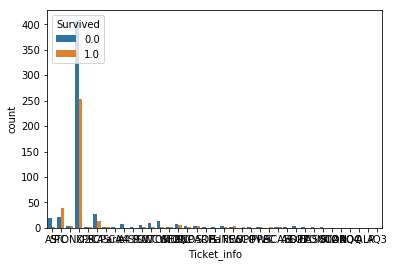

In [8]:
sns.countplot(data['Ticket_info'], hue=data['Survived'])
len(data['Ticket_info'].unique())

In [9]:
data['Cabin'] = data['Cabin'].astype('category').cat.codes
data['Embarked'] = data['Embarked'].astype('category').cat.codes
data['Pclass'] = data['Pclass'].astype('category').cat.codes
data['Sex'] = data['Sex'].astype('category').cat.codes
data['Title1'] = data['Title1'].astype('category').cat.codes
data['Title2'] = data['Title2'].astype('category').cat.codes
data['Ticket_info'] = data['Ticket_info'].astype('category').cat.codes

In [10]:
dataAgeNull = data[data["Age"].isnull()]      # 263 entries
dataAgeNotNull = data[data["Age"].notnull()]  # 1046 entries

remove_outlier = dataAgeNotNull[
    (np.abs(dataAgeNotNull["Fare"] - dataAgeNotNull["Fare"].mean()) > (4 * dataAgeNotNull["Fare"].std())) | 
    (np.abs(dataAgeNotNull["Family_Size"] - dataAgeNotNull["Family_Size"].mean()) > (4 * dataAgeNotNull["Family_Size"].std()))
]
remove_outlier

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
27,19.0,2,2,263.0000,"Fortune, Mr. Charles Alexander",2,28,0,1,3,0.0,19950,5,12,2,36
59,11.0,7,2,46.9000,"Goodwin, Master. William Frederick",2,60,2,1,5,0.0,CA 2144,7,8,0,7
71,16.0,7,2,46.9000,"Goodwin, Miss. Lillian Amy",2,72,2,0,5,0.0,CA 2144,7,9,1,7
88,23.0,2,2,263.0000,"Fortune, Miss. Mabel Helen",2,89,0,0,3,1.0,19950,5,9,1,36
258,35.0,7,0,512.3292,"Ward, Miss. Anna",0,259,0,0,0,1.0,PC 17755,0,9,1,14
311,18.0,1,0,262.3750,"Ryerson, Miss. Emily Borie",2,312,0,0,2,1.0,PC 17608,4,9,1,14
341,24.0,2,2,263.0000,"Fortune, Miss. Alice Elizabeth",2,342,0,0,3,1.0,19950,5,9,1,36
386,1.0,7,2,46.9000,"Goodwin, Master. Sidney Leonard",2,387,2,1,5,0.0,CA 2144,7,8,0,7
438,64.0,2,2,263.0000,"Fortune, Mr. Mark",4,439,0,1,1,0.0,19950,5,12,2,36
480,9.0,7,2,46.9000,"Goodwin, Master. Harold Victor",2,481,2,1,5,0.0,CA 2144,7,8,0,7


In [11]:
dataAgeNotNull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1046 entries, 0 to 1306
Data columns (total 16 columns):
Age            1046 non-null float64
Cabin          1046 non-null int8
Embarked       1046 non-null int8
Fare           1046 non-null float64
Name           1046 non-null object
Parch          1046 non-null int64
PassengerId    1046 non-null int64
Pclass         1046 non-null int8
Sex            1046 non-null int8
SibSp          1046 non-null int64
Survived       714 non-null float64
Ticket         1046 non-null object
Family_Size    1046 non-null int64
Title1         1046 non-null int8
Title2         1046 non-null int8
Ticket_info    1046 non-null int8
dtypes: float64(3), int64(4), int8(7), object(2)
memory usage: 88.9+ KB


In [12]:
dataAgeNull

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
5,NaN,7,1,8.4583,"Moran, Mr. James",0,6,2,1,0,0.0,330877,0,12,2,36
17,NaN,7,2,13.0000,"Williams, Mr. Charles Eugene",0,18,1,1,0,1.0,244373,0,12,2,36
19,NaN,7,0,7.2250,"Masselmani, Mrs. Fatima",0,20,2,0,0,1.0,2649,0,13,3,36
26,NaN,7,0,7.2250,"Emir, Mr. Farred Chehab",0,27,2,1,0,0.0,2631,0,12,2,36
28,NaN,7,1,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,2,0,0,1.0,330959,0,9,1,36
29,NaN,7,2,7.8958,"Todoroff, Mr. Lalio",0,30,2,1,0,0.0,349216,0,12,2,36
31,NaN,1,0,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,0,0,1,1.0,PC 17569,1,13,3,14
32,NaN,7,1,7.7500,"Glynn, Miss. Mary Agatha",0,33,2,0,0,1.0,335677,0,9,1,36
36,NaN,7,0,7.2292,"Mamee, Mr. Hanna",0,37,2,1,0,1.0,2677,0,12,2,36
42,NaN,7,0,7.8958,"Kraeff, Mr. Theodor",0,43,2,1,0,0.0,349253,0,12,2,36


In [13]:
# attributes
ageColumns = ['Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title1', 'Title2', 'Cabin', 'Ticket_info']

# set and to fit randaom forest model
rfModel_age = RandomForestRegressor(n_estimators=1000, random_state=42)
rfModel_age.fit(remove_outlier[ageColumns], remove_outlier["Age"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [14]:
ageNullValues = rfModel_age.predict(X=dataAgeNull[ageColumns])
dataAgeNull.loc[:, 'Age'] = ageNullValues
dataAgeNull

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
5,41.162690,7,1,8.4583,"Moran, Mr. James",0,6,2,1,0,0.0,330877,0,12,2,36
17,41.771439,7,2,13.0000,"Williams, Mr. Charles Eugene",0,18,1,1,0,1.0,244373,0,12,2,36
19,46.859500,7,0,7.2250,"Masselmani, Mrs. Fatima",0,20,2,0,0,1.0,2649,0,13,3,36
26,41.162690,7,0,7.2250,"Emir, Mr. Farred Chehab",0,27,2,1,0,0.0,2631,0,12,2,36
28,34.668788,7,1,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,2,0,0,1.0,330959,0,9,1,36
29,39.466529,7,2,7.8958,"Todoroff, Mr. Lalio",0,30,2,1,0,0.0,349216,0,12,2,36
31,49.372567,1,0,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,0,0,1,1.0,PC 17569,1,13,3,14
32,34.668788,7,1,7.7500,"Glynn, Miss. Mary Agatha",0,33,2,0,0,1.0,335677,0,9,1,36
36,41.162690,7,0,7.2292,"Mamee, Mr. Hanna",0,37,2,1,0,1.0,2677,0,12,2,36
42,41.162690,7,0,7.8958,"Kraeff, Mr. Theodor",0,43,2,1,0,0.0,349253,0,12,2,36


In [15]:
data = dataAgeNull.append(dataAgeNotNull)
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
5,41.162690,7,1,8.4583,"Moran, Mr. James",0,6,2,1,0,0.0,330877,0,12,2,36
17,41.771439,7,2,13.0000,"Williams, Mr. Charles Eugene",0,18,1,1,0,1.0,244373,0,12,2,36
19,46.859500,7,0,7.2250,"Masselmani, Mrs. Fatima",0,20,2,0,0,1.0,2649,0,13,3,36
26,41.162690,7,0,7.2250,"Emir, Mr. Farred Chehab",0,27,2,1,0,0.0,2631,0,12,2,36
28,34.668788,7,1,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,2,0,0,1.0,330959,0,9,1,36
29,39.466529,7,2,7.8958,"Todoroff, Mr. Lalio",0,30,2,1,0,0.0,349216,0,12,2,36
31,49.372567,1,0,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,0,0,1,1.0,PC 17569,1,13,3,14
32,34.668788,7,1,7.7500,"Glynn, Miss. Mary Agatha",0,33,2,0,0,1.0,335677,0,9,1,36
36,41.162690,7,0,7.2292,"Mamee, Mr. Hanna",0,37,2,1,0,1.0,2677,0,12,2,36
42,41.162690,7,0,7.8958,"Kraeff, Mr. Theodor",0,43,2,1,0,0.0,349253,0,12,2,36


In [16]:
data.reset_index(inplace=True, drop=True)
data

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
0,41.162690,7,1,8.4583,"Moran, Mr. James",0,6,2,1,0,0.0,330877,0,12,2,36
1,41.771439,7,2,13.0000,"Williams, Mr. Charles Eugene",0,18,1,1,0,1.0,244373,0,12,2,36
2,46.859500,7,0,7.2250,"Masselmani, Mrs. Fatima",0,20,2,0,0,1.0,2649,0,13,3,36
3,41.162690,7,0,7.2250,"Emir, Mr. Farred Chehab",0,27,2,1,0,0.0,2631,0,12,2,36
4,34.668788,7,1,7.8792,"O'Dwyer, Miss. Ellen ""Nellie""",0,29,2,0,0,1.0,330959,0,9,1,36
5,39.466529,7,2,7.8958,"Todoroff, Mr. Lalio",0,30,2,1,0,0.0,349216,0,12,2,36
6,49.372567,1,0,146.5208,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,32,0,0,1,1.0,PC 17569,1,13,3,14
7,34.668788,7,1,7.7500,"Glynn, Miss. Mary Agatha",0,33,2,0,0,1.0,335677,0,9,1,36
8,41.162690,7,0,7.2292,"Mamee, Mr. Hanna",0,37,2,1,0,1.0,2677,0,12,2,36
9,41.162690,7,0,7.8958,"Kraeff, Mr. Theodor",0,43,2,1,0,0.0,349253,0,12,2,36


In [17]:
train = data[pd.notnull(data['Survived'])].sort_values(by=["PassengerId"])
test = data[pd.isnull(data['Survived'])].sort_values(by=["PassengerId"])

In [18]:
train

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
263,22.000000,7,2,7.2500,"Braund, Mr. Owen Harris",0,1,2,1,1,0.0,A/5 21171,1,12,2,2
264,38.000000,2,0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,0,0,1,1.0,PC 17599,1,13,3,14
265,26.000000,7,2,7.9250,"Heikkinen, Miss. Laina",0,3,2,0,0,1.0,STON/O2. 3101282,0,9,1,31
266,35.000000,2,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,0,0,1,1.0,113803,1,13,3,36
267,35.000000,7,2,8.0500,"Allen, Mr. William Henry",0,5,2,1,0,0.0,373450,0,12,2,36
0,41.162690,7,1,8.4583,"Moran, Mr. James",0,6,2,1,0,0.0,330877,0,12,2,36
268,54.000000,4,2,51.8625,"McCarthy, Mr. Timothy J",0,7,0,1,0,0.0,17463,0,12,2,36
269,2.000000,7,2,21.0750,"Palsson, Master. Gosta Leonard",1,8,2,1,3,0.0,349909,4,8,0,36
270,27.000000,7,2,11.1333,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",2,9,2,0,0,1.0,347742,2,13,3,36
271,14.000000,7,0,30.0708,"Nasser, Mrs. Nicholas (Adele Achem)",0,10,1,0,1,1.0,237736,1,13,3,36


In [19]:
test

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Family_Size,Title1,Title2,Ticket_info
977,34.500000,7,1,7.8292,"Kelly, Mr. James",0,892,2,1,0,NaN,330911,0,12,2,36
978,47.000000,7,2,7.0000,"Wilkes, Mrs. James (Ellen Needs)",0,893,2,0,1,NaN,363272,1,13,3,36
979,62.000000,7,1,9.6875,"Myles, Mr. Thomas Francis",0,894,1,1,0,NaN,240276,0,12,2,36
980,27.000000,7,2,8.6625,"Wirz, Mr. Albert",0,895,2,1,0,NaN,315154,0,12,2,36
981,22.000000,7,2,12.2875,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,896,2,0,1,NaN,3101298,2,13,3,36
982,14.000000,7,2,9.2250,"Svensson, Mr. Johan Cervin",0,897,2,1,0,NaN,7538,0,12,2,36
983,30.000000,7,1,7.6292,"Connolly, Miss. Kate",0,898,2,0,0,NaN,330972,0,9,1,36
984,26.000000,7,2,29.0000,"Caldwell, Mr. Albert Francis",1,899,1,1,1,NaN,248738,2,12,2,36
985,18.000000,7,0,7.2292,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,900,2,0,0,NaN,2657,0,13,3,36
986,21.000000,7,2,24.1500,"Davies, Mr. John Samuel",0,901,2,1,2,NaN,A/4 48871,2,12,2,1


In [20]:
attributes = ['Age', 'Embarked', 'Fare', 'Pclass', 'Sex', 'Family_Size', 'Title2', 'Ticket_info', 'Cabin']
label = ['Survived']
train_x, test_x = train[attributes], test[attributes]
train_y= train[label]

rf = RandomForestClassifier(criterion='gini',
                            n_estimators=1000,
                            min_samples_split=12,
                            min_samples_leaf=1,
                            oob_score=True,
                            random_state=1,
                            n_jobs=-1)
rf.fit(train_x, train_y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=12,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [21]:
rf_predict = rf.predict(test_x)
submit['Survived'] = rf_predict
submit.head(n=10)

,PassengerId,Survived
0,892,0.0
1,893,1.0
2,894,0.0
3,895,0.0
4,896,1.0
5,897,0.0
6,898,0.0
7,899,0.0
8,900,1.0
9,901,0.0


In [22]:
submit['Survived'] = submit['Survived'].astype(int)
submit.to_csv('./submit.csv', index=False)
print('stop')


stop
